In [8]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import seaborn as sns

import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import warnings
warnings.filterwarnings(action='ignore')

# 단순 선형 회귀

In [3]:
# 샘플 데이터 생성
X=2*np.random.rand(100,1) # 100 개의 독립변수 생성
y=4+3*X+np.random.randn(100,1) # 100개의 종속 변수 생성.

# 모든 샘플에 1을 추가
X_b=np.c_[np.ones((100,1)),X]
# 역행렬을 구하고 (inc) 행렬 곱셈 (dot)을 수행
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best) # 잡음 때문에 4와 3은 나오지 않는다. 

[[4.30349361]
 [2.72024094]]


In [5]:
# 예측
X_new=np.array([[0],[2]])

X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
print(y_predict)

[[4.30349361]
 [9.74397549]]


# 보스톤 주택 정보를 이용한 선형 회귀

In [11]:
data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_url,sep='\s+',skiprows=22,header=None)
data=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target=raw_df.values[1::2,2]
print(target)
data

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [17]:
bostonDF=pd.DataFrame(data,columns= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT',
'RAD'])
bostonDF['PRICE']=target
print(bostonDF.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO     B  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0    296.0  15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0    242.0  17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0    242.0  17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0    222.0  18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0    222.0  18.7   

    LSTAT   RAD  PRICE  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  


In [18]:
cols=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD','PRICE']
bostonDF[cols].corr()

,RM,ZN,INDUS,NOX,AGE,PTRATIO,LSTAT,RAD,PRICE
RM,1.000000,0.311991,-0.391676,-0.302188,-0.240265,-0.292048,0.128069,-0.613808,0.695360
ZN,0.311991,1.000000,-0.533828,-0.516604,-0.569537,-0.314563,0.175520,-0.412995,0.360445
INDUS,-0.391676,-0.533828,1.000000,0.763651,0.644779,0.720760,-0.356977,0.603800,-0.483725
NOX,-0.302188,-0.516604,0.763651,1.000000,0.731470,0.668023,-0.380051,0.590879,-0.427321
AGE,-0.240265,-0.569537,0.644779,0.731470,1.000000,0.506456,-0.273534,0.602339,-0.376955
PTRATIO,-0.292048,-0.314563,0.720760,0.668023,0.506456,1.000000,-0.441808,0.543993,-0.468536
LSTAT,0.128069,0.175520,-0.356977,-0.380051,-0.273534,-0.441808,1.000000,-0.366087,0.333461
RAD,-0.613808,-0.412995,0.603800,0.590879,0.602339,0.543993,-0.366087,1.000000,-0.737663
PRICE,0.695360,0.360445,-0.483725,-0.427321,-0.376955,-0.468536,0.333461,-0.737663,1.000000


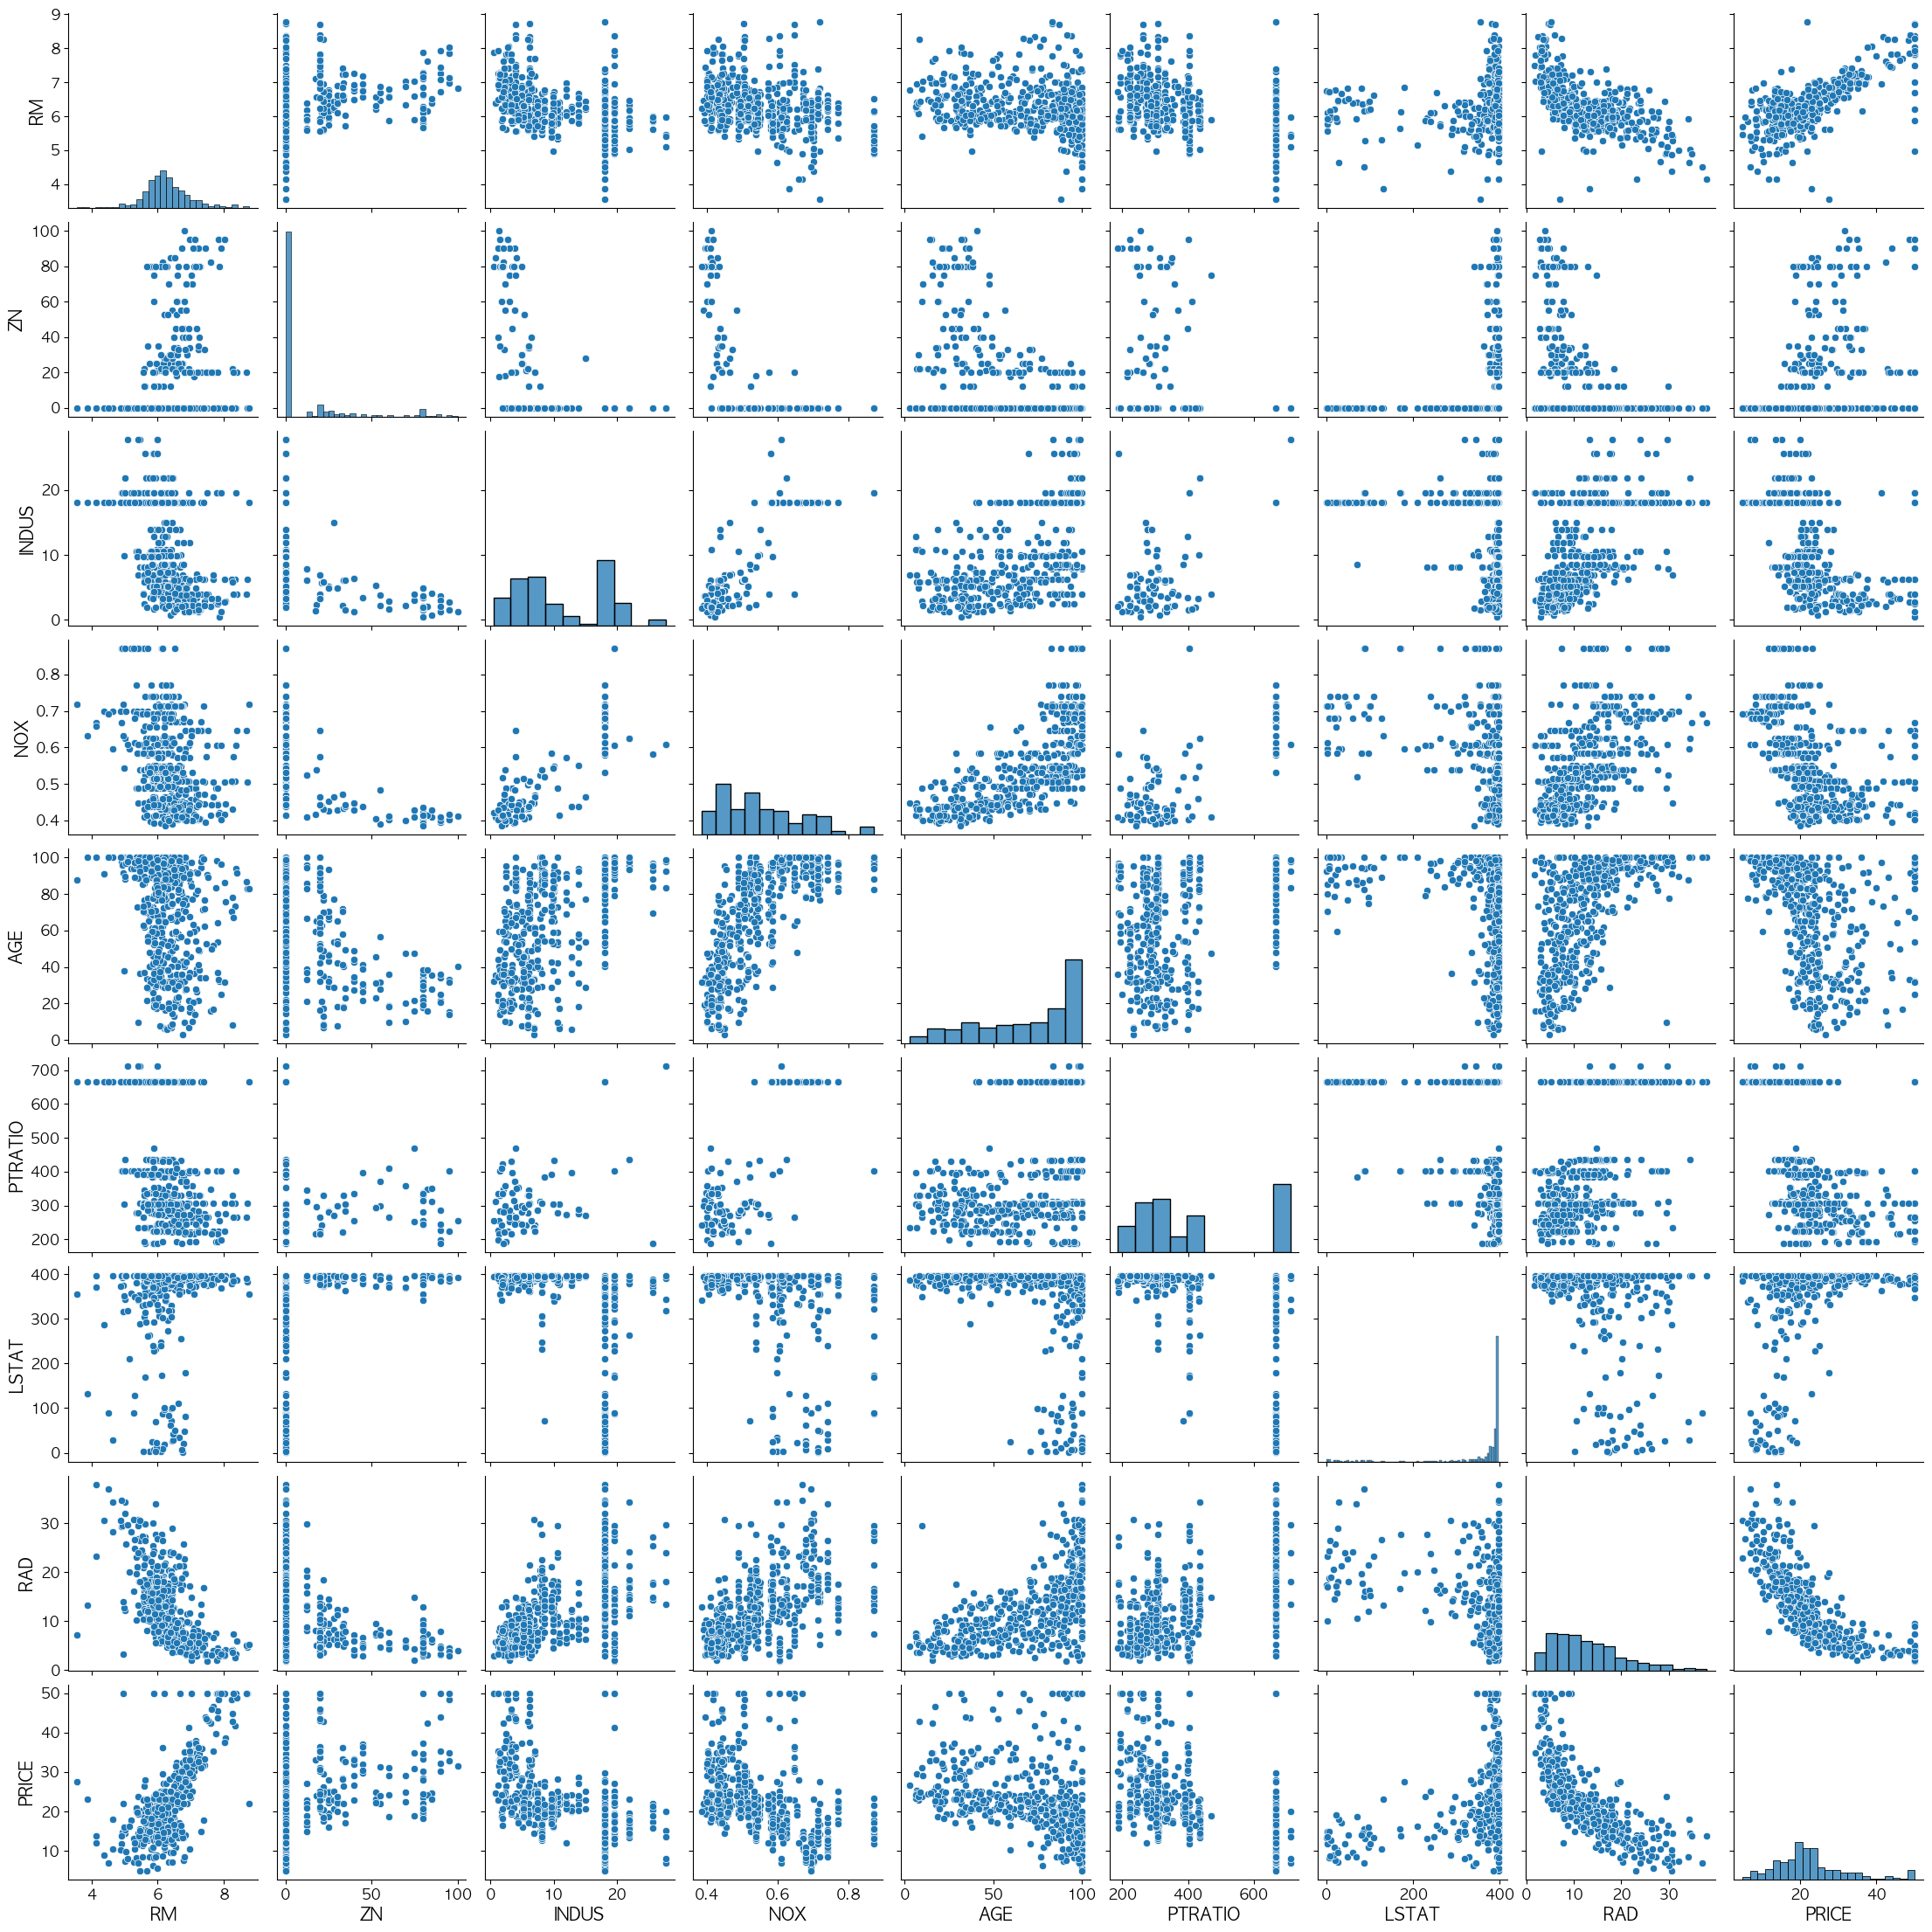

In [19]:
# 데이터의 상관관계를 파악하기 위해 시각화
sns.pairplot(bostonDF[cols],height=2.5)
plt.show()

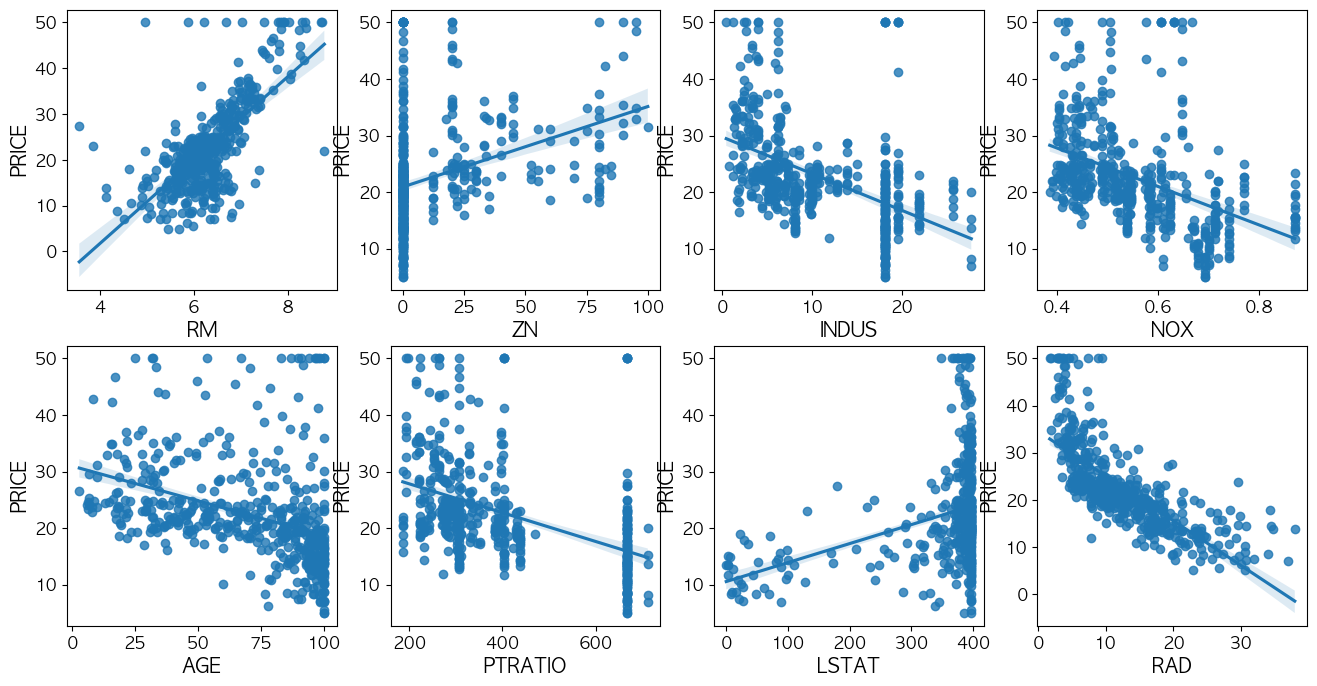

In [24]:
# 피쳐로 사용할 열들의 상관 관계를 확인. 
# 피쳐들간의 상관관계가 높으면 다중 공선성이 발생한다. 


# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

# y 자리에 독립변수를 넣으면 상관관계 파악이 가능하다. 




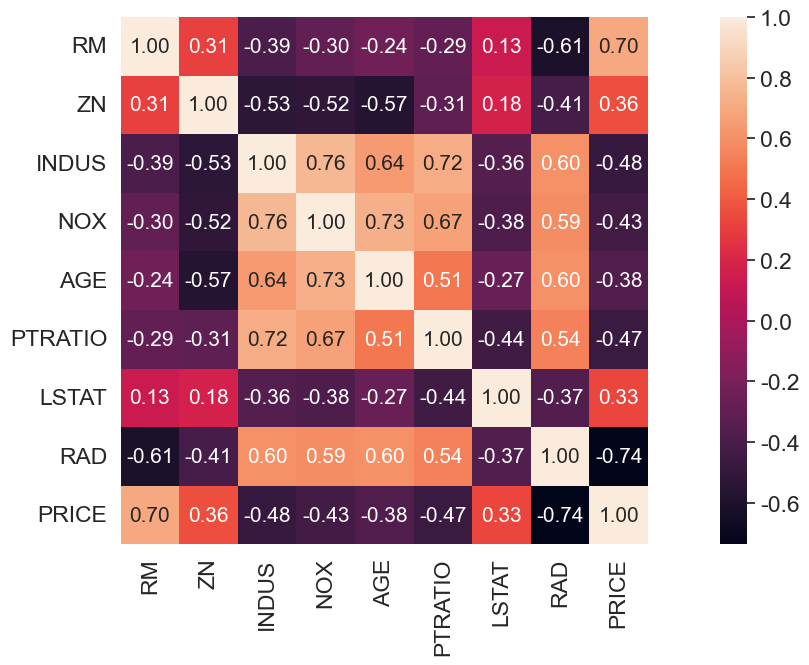

In [25]:
#5개 속성의 상관 계수 확인
import numpy as np
cm = np.corrcoef(bostonDF[cols].values.T)
plt.figure(figsize=(15,7))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

In [27]:
# Rm 을 이용한 PRice 예측 - 단변량 회귀
from scipy import stats
slope,intercept,r_value,p_value,stderr=stats.linregress(bostonDF['RM'],bostonDF['PRICE'])

print("기울기:", slope)
print("절편:", intercept)
print("상관계수", r_value)
print("불확실성 정도:", p_value)
print("방이 4개일 때 주택 가격:", end=' ')
print((4 * slope + intercept) * 1000, '$')
print('=======================================================')

기울기: 9.102108981180313
절편: -34.67062077643858
상관계수 0.6953599470715396
불확실성 정도: 2.487228871007385e-74
방이 4개일 때 주택 가격: 1737.8151482826709 $


In [31]:
# sklearn 을 이용한 단변량 회귀
from sklearn.linear_model import LinearRegression

slr=LinearRegression()
X=bostonDF[['RM']].values
y=bostonDF['PRICE'].values
slr.fit(X,y)
print('기울기: ',slr.coef_) # 배열로 제공. => 여러개가 나오면 다변량 회귀분석. 
print('절편',slr.intercept_)

기울기:  [9.10210898]
절편 -34.67062077643851


* 선형 회귀 모델에서의 outlier

In [33]:
# RANSAC 방법을 이용한 회귀
from sklearn.linear_model import RANSACRegressor

ransac=RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,loss='absolute_error',residual_threshold=5.0,random_state=42)
ransac.fit(X,y)


print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: 9.520
절편: -36.493


### MSE 와 R^2 값을 이용한 성능 평가

In [36]:
from sklearn.model_selection import train_test_split

#회귀분석 수행
X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

slr = LinearRegression()

slr.fit(X_train, y_train)

#분석의 결과로나온 모델을 가지고 훈련 데이터와 검증 데이터의 결과를 생성
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)



from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 45.013, 테스트 MSE: 40.351
훈련 R^2: 0.488, 테스트 R^2: 0.458
